In [163]:
import pandas as pd
import os

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "product_quality_dataset.csv")
df_petr = pd.read_csv(path_file, header=0)

df_petr.head()

,Power Consumption (kW),Cooling Capacity (BTU),Noise Level (dB),EER,Temperature Range (°C),Airflow (m³/min),Warranty (Years),Build Quality Rating,Maintenance Cost ($),Type,Efficiency Score
0,2.87,24000,47.39,3.55,20,9.20,3,10,188,0,96
1,5.75,18000,44.66,3.28,30,12.01,5,6,297,1,77
2,4.66,30000,46.25,3.82,30,29.23,6,5,381,1,83
3,3.99,9000,40.67,2.72,18,17.42,3,9,299,1,75
4,1.78,30000,57.23,3.77,30,21.90,3,3,198,0,84


In [164]:
X = df_petr.drop('Efficiency Score', axis=1)
y = df_petr['Efficiency Score']

In [165]:
X.head()

,Power Consumption (kW),Cooling Capacity (BTU),Noise Level (dB),EER,Temperature Range (°C),Airflow (m³/min),Warranty (Years),Build Quality Rating,Maintenance Cost ($),Type
0,2.87,24000,47.39,3.55,20,9.20,3,10,188,0
1,5.75,18000,44.66,3.28,30,12.01,5,6,297,1
2,4.66,30000,46.25,3.82,30,29.23,6,5,381,1
3,3.99,9000,40.67,2.72,18,17.42,3,9,299,1
4,1.78,30000,57.23,3.77,30,21.90,3,3,198,0


In [166]:
y.head()

0    96
1    77
2    83
3    75
4    84
Name: Efficiency Score, dtype: int64

In [167]:
from sklearn.model_selection import train_test_split

# Primeiro, separe 20% dos dados para o conjunto de teste
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Em seguida, separe 25% dos dados restantes para o conjunto de validação
# Isso resulta em 20% do total original (0.25 * 0.8 = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

In [168]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (600, 10)
X_val shape: (200, 10)
X_test shape: (200, 10)
y_train shape: (600,)
y_val shape: (200,)
y_test shape: (200,)


In [169]:
from sklearn.tree import DecisionTreeRegressor
regres = DecisionTreeRegressor()
regres.fit(X_train, y_train)

DecisionTreeRegressor()

In [170]:
y_train_pred = regres.predict(X_train)
y_val_pred = regres.predict(X_val)
y_test_pred = regres.predict(X_test)

In [171]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df.head()

,Actual,Predicted
993,94,92.0
859,49,51.0
298,57,52.0
553,67,67.0
672,82,84.0


In [172]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"MSE - Treino: {mse_train:.2f}")  
print(f"MSE - Validação: {mse_val:.2f}")
print(f"MSE - Teste: {mse_test:.2f}")

print(f"MAE - Treino: {mae_train:.2f}")
print(f"MAE - Validação: {mae_val:.2f}")
print(f"MAE - Teste: {mae_test:.2f}")

MSE - Treino: 0.00
MSE - Validação: 19.88
MSE - Teste: 21.62
MAE - Treino: 0.00
MAE - Validação: 3.44
MAE - Teste: 3.56


In [173]:
from sklearn.metrics import r2_score

R_train = r2_score(y_train, y_train_pred)
R_val = r2_score(y_val, y_val_pred)
R_test = r2_score(y_test, y_test_pred)

print(f"R2 score (treino): {R_train:.3f}")
print(f"R2 score (validação): {R_val:.3f}")
print(f"R2 score (teste): {R_test:.3f}")

R2 score (treino): 1.000
R2 score (validação): 0.891
R2 score (teste): 0.875


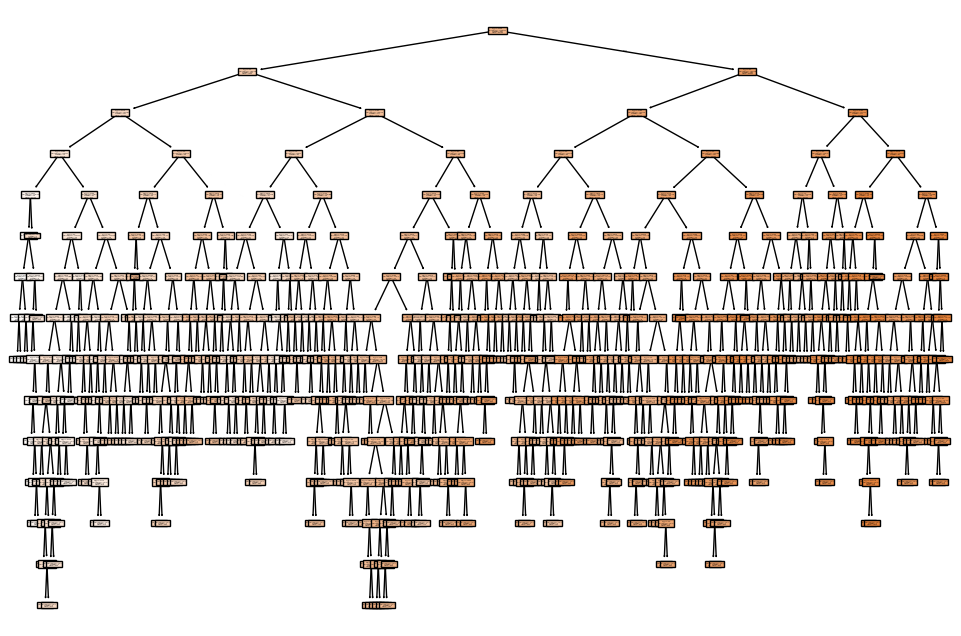

In [174]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(regres, filled = True)
plt.show()